In [78]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 as cv 
import warnings as warn 
import pandas as pd 
warn.simplefilter('ignore')
sns.set_style('darkgrid')

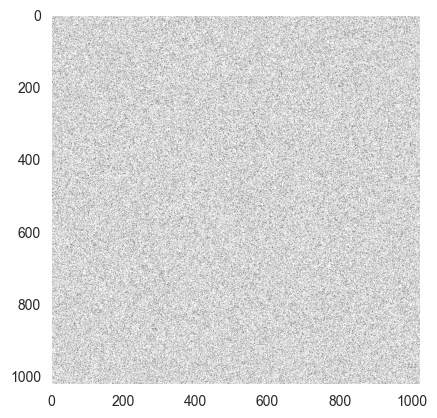

In [73]:
def generate_rayleigh(scale, shape):
    rayleigh = np.random.rayleigh(scale, shape)
    rayleigh = np.where(rayleigh > 255, 255, rayleigh)
    rayleigh = np.where(rayleigh < 0, 0, rayleigh)
    return rayleigh

rayleigh_img = generate_rayleigh(230, (1024, 1024))
plt.imshow(rayleigh_img, cmap='gray')
plt.grid(False)
plt.show()

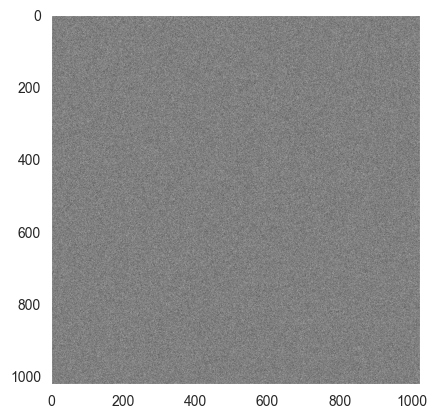

In [72]:
def generate_gaussian(mean : float, std : float, shape: tuple):
    gaussian_img = mean + std*np.random.randn(shape[0], shape[1])
    img = np.where(gaussian_img > 255, 255, gaussian_img)
    img = np.where(img < 0, 0, img)
    return img 

gaussian_img = generate_gaussian(129, 5, (1024, 1024))
gaussian_img = gaussian_img.astype(np.int32)
plt.imshow(gaussian_img, cmap='gray')
plt.grid(False)
plt.show()

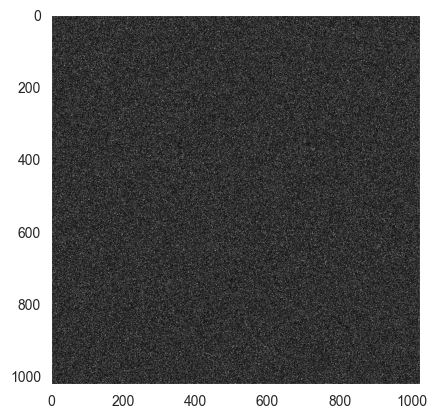

In [77]:
def generate_exponential(mean, shape: tuple):
    exponential = np.random.exponential(mean, shape)
    img = np.where(exponential > 255, 255, exponential)
    img = np.where(img < 0, 0, img)
    return img 


exponent_img = generate_exponential(50, (1024, 1024))
exponent_img = exponent_img.astype(np.int32)
plt.imshow(exponent_img, cmap='gray')
plt.grid(False)
plt.show()

<Axes: >

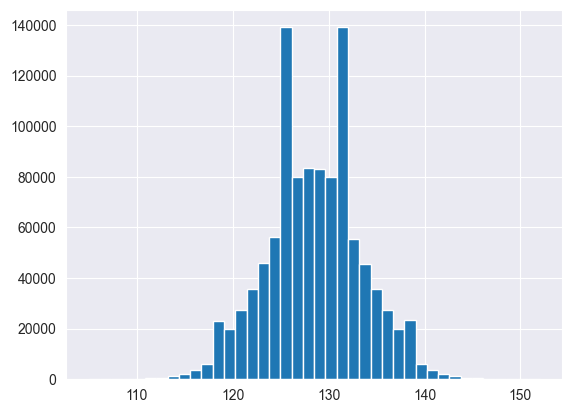

In [80]:
pd.Series(gaussian_img.flatten()).hist(bins=40)

<Axes: >

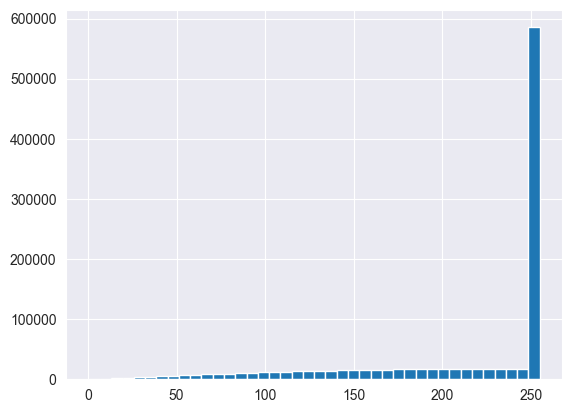

In [81]:
pd.Series(rayleigh_img.flatten()).hist(bins=40)

<Axes: >

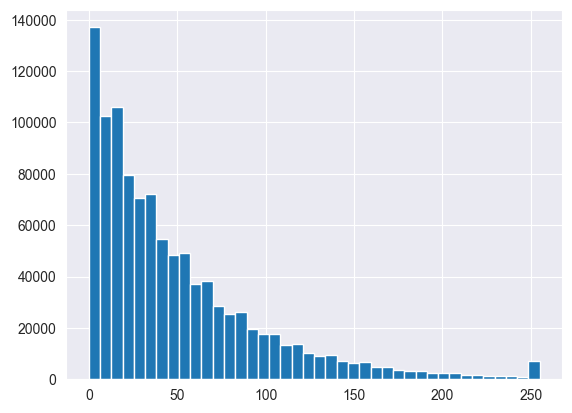

In [82]:
pd.Series(exponent_img.flatten()).hist(bins=40)

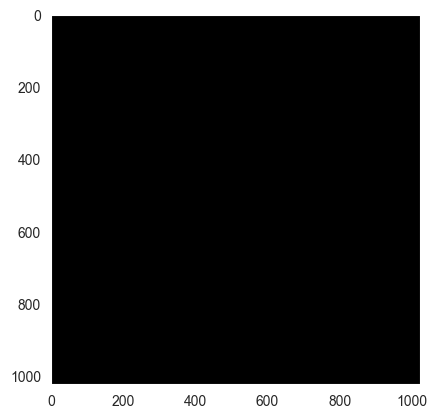

In [86]:
def generate_gamma(a, b, shape):
    erlang = np.random.gamma(a, b, shape)
    erlang = np.where(erlang > 255, 255, erlang)
    erlang = np.where(erlang < 0, 0, erlang)
    return erlang 

gamma_img = generate_gamma(512, 1, (1024, 1024))
gamma_img = gamma_img.astype(np.int32)
plt.imshow(gamma_img, cmap='gray')
plt.grid(False)
plt.show()

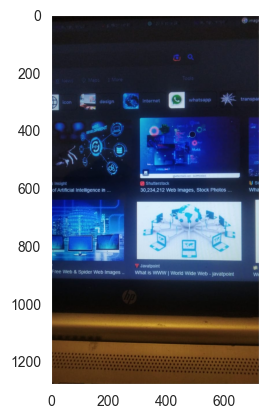

In [88]:
img = cv.cvtColor(cv.imread('random.jpeg'), cv.COLOR_BGR2RGB) 
plt.imshow(img)
plt.grid(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


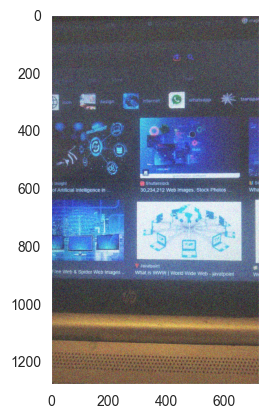

In [111]:
noise = generate_exponential(220, img.shape)
noise = noise.astype(np.int32)
img = img.astype(np.int32)
noise_img = cv.addWeighted(img, 0.85, noise, 0.35, 0.01)
plt.grid(False)
plt.imshow(noise_img)

array([[[17, 13, 12],
        [15, 11, 10],
        [14, 10,  9],
        ...,
        [14, 10,  9],
        [14, 10,  9],
        [13,  9,  8]],

       [[17, 13, 12],
        [15, 11, 10],
        [14, 10,  9],
        ...,
        [16, 12, 11],
        [16, 12, 11],
        [16, 12, 11]],

       [[17, 13, 12],
        [15, 11, 10],
        [14, 10,  9],
        ...,
        [18, 14, 13],
        [18, 14, 13],
        [18, 14, 13]],

       ...,

       [[43, 38, 34],
        [32, 25, 19],
        [24, 13,  7],
        ...,
        [77, 55, 32],
        [78, 57, 36],
        [77, 59, 39]],

       [[55, 51, 48],
        [36, 32, 29],
        [24, 17, 11],
        ...,
        [74, 53, 34],
        [74, 55, 38],
        [75, 58, 40]],

       [[62, 61, 59],
        [41, 37, 34],
        [23, 18, 14],
        ...,
        [70, 52, 32],
        [73, 54, 39],
        [74, 57, 41]]], dtype=uint8)